<a href="https://colab.research.google.com/github/amanacden/Data-Science--Cheat-Sheet/blob/master/nlpanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
#nltk.download('punkt')
#nltk.download('stopwords')
#pip install emoji
#nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy  as np
import nltk
from datetime import datetime, timedelta
import string
import emoji
import re
import seaborn as sns
sns.set(style='darkgrid')

from wordcloud import WordCloud
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/chat/newnlp.csv")

#data['FirstTextDate'] = pd.to_datetime(data['FirstTextDate'], format='%d-%m-%y')
#data['LastTextDate'] = pd.to_datetime(data['LastTextDate'], format='%d-%m-%y')
#data['Date'] = pd.to_datetime(data['Date'], format='%d %B %Y')
#data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')
data = data[data['Name']!='Chayadeep']
data['Gender'][data['Gender']=='f'] = 0
data['Gender'][data['Gender']=='m'] = 1  
data['Gender'] = data['Gender'].astype(int)

dname = data.groupby(['Name'])['DaysTexted','DaysBeen','ActiveDays','Gender'].mean()
dname['Consistency'] = 100*dname['DaysTexted']/dname['DaysBeen']
dname['TimesTexted'] = data.groupby(['Name'])['Name'].count()
dname['Frequentness'] = 100*dname['TimesTexted']/dname['DaysBeen']
dname['Agressiveness'] = 100*dname['TimesTexted']/dname['ActiveDays']
#dname.sort_values(by='Consistency',ascending=False)
#dname.sort_values(by='TimesTexted',ascending=False)
print('😎 '+'Aman Jain')

😎 Aman Jain


In [0]:
names = pd.DataFrame(data.groupby(['Name']).size(),columns={'TextTimes'}).reset_index()
names['avgWordspertext'] = 0
names['minWordspertext'] = 0
names['maxWordspertext'] = 0
names['evocab'] = 0
names['totalemojis'] = 0
names['top5emojis'] = 0
names['vocab'] = 0
names['top5words'] = 0
def nltk_sentiment(sentence):
      nltk_sentiment = SentimentIntensityAnalyzer()
      score = nltk_sentiment.polarity_scores(sentence)
      return score
def getResult(pos, neu, neg):
    if (pos > neu and pos > neg):
        return ("Positive")
    elif (neg > neu and neg > pos):
        return ("Negative")
    else:
        return('Neutral')

dfHFreqs = pd.DataFrame(data.groupby(['Hour'])['Hour'].count())
dfHFreqs.columns = ['Group']
dfHFreqs = dfHFreqs.reset_index()
dfHFreqs.columns = ['Hour','Group']
s = dfHFreqs['Group'].sum()
dfHFreqs['Group'] = 100*dfHFreqs['Group']/s

names['Pos'] = 0
names['Neu'] = 0
names['Neg'] = 0
names['avgTime'] = 0
stop = set(stopwords.words('english'))
ylabel='% of total time spent'
xlabel='Time clock in 24 hours'

dstr = ' '.join(data['Text'])
dlist = data['Text'].to_list()

L1 = []
for l in dlist:
  L1.append(len(l.split()))

LE = []
LE = [c for c in dstr if c in emoji.UNICODE_EMOJI]
dfE = pd.DataFrame({'Emoji':LE})
dfEFreqs = pd.DataFrame(dfE.groupby(['Emoji'])['Emoji'].count())
dfEFreqs.columns = ['Freq']
dfEFreqs = dfEFreqs.reset_index()
dfEFreqs.columns = ['Emoji','Freq']
evocab = len(dfEFreqs)
totalemojis = dfEFreqs['Freq'].sum()
dfEFreqs = dfEFreqs.sort_values('Freq',ascending=False)
top5emojis =  ' '.join(dfEFreqs['Emoji'][0:5])

In [11]:
evocab

157

In [12]:
totalemojis

5081

In [33]:
print('Top 10 emojis used in the group')
dfEFreqs.set_index('Emoji').head(10)

Top 10 emojis used in the group


,Freq
Emoji,
😂,992
😅,613
🏻,424
😁,297
🙈,210
🤣,172
👍,159
🥳,133
🎉,117


In [0]:
demoji = dstr.encode('ascii', 'ignore').decode('ascii')
demoji = re.sub(r'[`!?~@#$%^&*()_+-=<>,.:;]', '', demoji)
demoji = re.sub(r'[–]', '', demoji)
demoji = re.sub(r'[\[\]\(\)\{\}]', '', demoji)
demoji = re.sub(r'[\t\"\'\/\\]', '', demoji)
lstAllWords = demoji.split()

lstTmpWords=[]
for strWord in lstAllWords:
    if len(strWord)>3:
        lstTmpWords.append(strWord)
lstAllWords = lstTmpWords
del lstTmpWords

for i in range(0,len(lstAllWords)):
    lstAllWords[i] = str.lower(lstAllWords[i])

dfWords = pd.DataFrame({'Words':lstAllWords})
dfWords = dfWords[-dfWords['Words'].isin(stop)]
dfWords = dfWords[-dfWords['Words'].isin(emoji.UNICODE_EMOJI.keys())]

dfFreqs = pd.DataFrame(dfWords.groupby(['Words'])['Words'].count())
dfFreqs.columns = ['Freq']
dfFreqs = dfFreqs.reset_index()
dfFreqs.columns = ['Word','Freq']
vocab = len(dfFreqs)
totalwords = dfFreqs['Freq'].sum()
dfFreqs = dfFreqs.sort_values('Freq',ascending=False)
#names['top5words'][names['Name']==name] = ' '.join(dfFreqs['Word'][0:10])

In [29]:
vocab

6268

In [30]:
totalwords

44853

In [34]:
dfFreqs.set_index('Word').head(10)

,Freq
Word,
purdue,452
thanks,436
congrats,375
yeah,365
congratulations,356
guys,349
think,322
dont,304
also,289


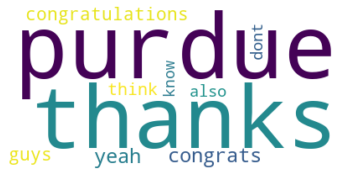

In [35]:
d = {}
for a, x in dfFreqs[0:10].values:
    d[a] = x 
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [0]:
lstLines = sent_tokenize(dstr)
lstLines = [t.lower() for t in lstLines]
lstLines = [t.translate(str.maketrans('','',string.punctuation)) for t in lstLines]
saResults = [nltk_sentiment(t) for t in lstLines]
# create dataframe
df = pd.DataFrame(lstLines, columns=['Lines'])
df['Pos']=[t['pos'] for t in saResults]
df['Neu']=[t['neu'] for t in saResults]
df['Neg']=[t['neg'] for t in saResults]
#df['Result']= [getResult(t['pos'],t['neu'],t['neg']) for t in saResults]
pos = df['Pos'].mean()
neu = df['Neu'].mean()
neg = df['Neg'].mean()  

In [37]:
print(pos)
print(neu)
print(neg)

0.1957756544082222
0.7650390236068744
0.03532953268026337


In [0]:
dfHFreqs = dfHFreqs.set_index('Hour')

<Figure size 432x288 with 0 Axes>

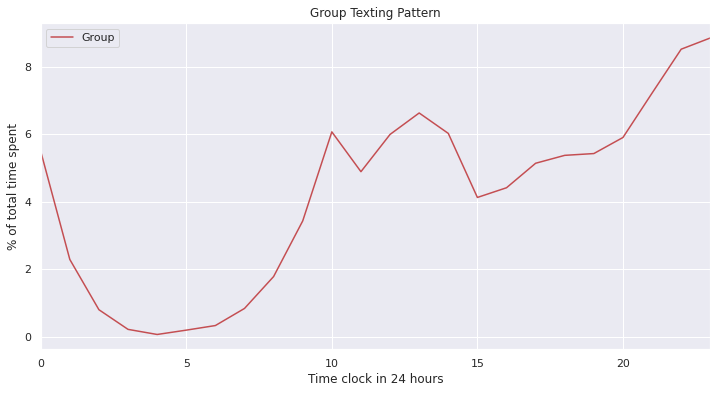

In [42]:
title='Group Texting Pattern'
plt.figure()
ax = dfHFreqs.plot(legend=True,figsize=(12,6),title=title,color='r')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [0]:
On scrolling down, you will find:

Top 10 Popular folks
Top 10 Consistent folks
Top 10 most Frequently texting folks

Top 10 Favorite words of everyone (wordcloud)

Top 10 most Emoji-using folks
Top 10 follks with hishest Emoji vocab
Top 10 folks who write LONG texts
Top 10 folks who write SHORT texts
Top 10 Positively texting folks
Top 10 Neutraly texting folks
Top 10 folks with diverse vocab
Top 5 emojis most used by Top 10 popular folks
Top 5 most used words by Top 10 frequently texting folks



As Women as not even half of Men, here goes one exclusively for Women

Top 10 Popular Women 
Top 10 Consistent women
Top 10 most Frequently texting women
Top 10 most Emoji-using Women
Top 10 Women with hishest Emoji vocab
Top 10 Women who write LONG texts
Top 10 Women who write SHORT texts
Top 10 Positively texting Women
Top 10 Neutraly texting Women
Top 10 Women with diverse vocab
Top 5 emojis most used by Top 10 popular women
Top 5 most used words by Top 10 frequently texting women


Texting Pattern of everyone (compared with group) during 24 hours


Group Characteristics
Number of Men and Women in the group
Group Emoji Vocab
Total Emojis used in the group:
Top 10 emojis used in the group
5% of words used were emojis
Top 10 words used in the group

Group Texting Pattern
